# Classification ascendante hiérarchique

La classification ascendante hiérarchique (CAH) est une méthode de clustering très répandue. Elle propose une manière de répartir les observations entre elles en fonction de leurs distances les unes vis-à-vis des autres et offre des outils très utiles pour déterminer un nombre de classes pertinent pour une problématique donnée. 

## Distances entre les individus  
La matrice de distances donne les distances de chaque observation à toutes les autres, en utilisant une métrique choisie par l'utilisateur. Elle permet de mesurer la dissimilarité entre les observations et de les classer en fonction de leur proximité.  
À partir de ces distances, on crée une matrice de liens qui agglomère les points au fur et à mesure en partant de la distance la plus faible, recalculant à chaque fois la distance d'une nouvelle classe avec les autres classes déjà créées (ou les points encore définis comme des classes à un seul élément). 

Reprenons l'exemple des fromages :  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import des données
df = pd.read_csv('../carac_fromages.txt', sep = "\t")
df

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [3]:
# données et labels
X = df.drop('Fromages', axis=1)
y = df.Fromages

In [4]:
# on standardise
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Matrice de liens
Après avoir classé les individus en fonction de leur distance les uns vis à vis des autres (avec la matrice de distance), la matrice de liens renvoyée contient n-1 lignes et 4 colonnes. A chaque itération de l'algorithme, les indices Z[i, 0] et Z[i, 1] sont combinés pour former une classe n+i. Lorsque les indices sont inférieurs à n, ils se réfèrent à des clusters uniquement constitués d'observations de départ. La distance entre deux clusters est donnée par la 3e colonne. La dernière valeur explicite le nombre d'observations originales dans le cluster ainsi formé.  



In [5]:
# affichage de la matrice des distances (c'est pas nécessaire car linkage le fait au passage mais c'est juste pour la voir)
from scipy.spatial.distance import pdist
d = pdist(X_sc, metric='euclidean')
print(d.shape)
print(d)

(406,)
[3.14861335 5.2500022  2.31663768 3.22970879 3.80477577 2.76186614
 3.0365995  3.99750932 5.53130204 1.72093864 4.655642   5.80338678
 5.07599924 2.87448647 5.83722251 5.2523797  3.85092141 3.25506854
 5.7268443  5.01477155 2.87929026 2.94884342 3.0742989  2.88813419
 3.71932359 2.48989948 3.85154487 6.48064107 3.06129104 2.53329285
 3.37247132 1.46924405 3.5130959  3.45498496 2.24990606 3.57074674
 2.61269206 2.01840864 3.37337075 5.34718389 1.97347696 5.57348086
 5.26524374 1.86867884 0.96951123 3.41513312 5.02981354 1.06814207
 1.1604844  0.82483528 2.70145899 0.85576839 1.42886586 1.51752785
 5.50833648 3.87204864 5.57990342 2.21898725 4.70044102 5.38581555
 1.98145688 1.14064288 4.66622216 2.13296678 1.20429903 7.38970005
 4.59538546 7.89685679 7.50484158 2.54914277 2.63624244 3.07932426
 7.32118579 3.58049136 2.66651644 3.18281331 4.18472914 3.03408082
 3.60807329 2.51665891 7.7275394  3.5016762  2.29206789 3.34942633
 3.74654775 3.32604354 4.38012398 2.85449524 3.48368524

In [6]:
# pour pouvoir récupérer les indices des observations de chaque distance on passe par squareform
from scipy.spatial.distance import squareform
d_sq = squareform(d)
print(d_sq.shape)
pd.DataFrame(d_sq)

(29, 29)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,3.148613,5.250002,2.316638,3.229709,3.804776,2.761866,3.036600,3.997509,5.531302,...,5.726844,5.014772,2.879290,2.948843,3.074299,2.888134,3.719324,2.489899,3.851545,6.480641
1,3.148613,0.000000,3.061291,2.533293,3.372471,1.469244,3.513096,3.454985,2.249906,3.570747,...,3.415133,5.029814,1.068142,1.160484,0.824835,2.701459,0.855768,1.428866,1.517528,5.508336
2,5.250002,3.061291,0.000000,3.872049,5.579903,2.218987,4.700441,5.385816,1.981457,1.140643,...,3.079324,7.321186,3.580491,2.666516,3.182813,4.184729,3.034081,3.608073,2.516659,7.727539
3,2.316638,2.533293,3.872049,0.000000,3.501676,2.292068,3.349426,3.746548,3.326044,4.380124,...,4.574438,5.932036,2.782369,2.217825,2.478073,2.647795,2.771302,2.698479,2.882731,6.614656
4,3.229709,3.372471,5.579903,3.501676,0.000000,4.207192,3.109050,1.886857,4.444206,5.962371,...,4.773939,5.110761,3.799266,3.963085,3.176286,3.572533,3.478222,3.699106,4.449582,6.246979
5,3.804776,1.469244,2.218987,2.292068,4.207192,0.000000,4.166052,4.371310,2.105735,2.975014,...,3.116980,6.218260,2.129923,1.317544,1.707156,2.855625,1.477959,2.316698,1.625928,6.426217
6,2.761866,3.513096,4.700441,3.349426,3.109050,4.166052,0.000000,1.991250,3.601505,4.719950,...,5.111951,5.276507,3.696345,3.507140,3.207471,3.461367,3.995948,3.325118,3.878883,7.065861
7,3.036600,3.454985,5.385816,3.746548,1.886857,4.371310,1.991250,0.000000,3.997321,5.654161,...,5.153913,5.019004,3.739712,3.820969,3.035915,3.075325,3.870471,3.361471,4.240682,6.585807
8,3.997509,2.249906,1.981457,3.326044,4.444206,2.105735,3.601505,3.997321,0.000000,2.514654,...,3.401352,6.437543,2.625121,1.717663,2.287578,2.856138,2.610581,2.221326,2.328009,7.347173
9,5.531302,3.570747,1.140643,4.380124,5.962371,2.975014,4.719950,5.654161,2.514654,0.000000,...,3.203112,7.609368,4.036667,3.238038,3.646682,4.659922,3.645463,4.055406,3.121286,8.134781


In [7]:
# on trie les distances
d = sorted(d)
print(d)

[0.7356902002971228, 0.8248352806055159, 0.8557683871645857, 0.8967296909227964, 0.9593541932211533, 0.9695112262823641, 1.020928787423187, 1.068142066289251, 1.1380554399169718, 1.140642880432807, 1.1604844016051272, 1.1892384134117386, 1.204299028771838, 1.2238579827284473, 1.229062424456852, 1.2401146818479967, 1.317543875079477, 1.39661828353865, 1.4006293724779666, 1.420165434628864, 1.4288658571207846, 1.444430707717644, 1.4552655973273991, 1.4692440525582529, 1.4779594028597263, 1.4781598888745018, 1.493434078268468, 1.5175278453923022, 1.5700806138674746, 1.5986931003045646, 1.6148571491598895, 1.6259278208362136, 1.626530618095696, 1.6356460472013326, 1.6397752135034482, 1.6727297302355106, 1.6795162097266665, 1.6898313379451408, 1.6967555297384311, 1.7010607227602603, 1.7071562019358641, 1.7176631019499902, 1.7209386353085918, 1.7676366076773806, 1.78710321093267, 1.811653151090942, 1.8152992743816927, 1.8385597947261945, 1.864729053792694, 1.8686788391505285, 1.8868568475587

In [8]:
# puis on peut récupérer les indices concernés (on le fait que pour les 8 premières distances)
for k in range(15):
    print(np.where(d_sq==d[k]))

(array([16, 20]), array([20, 16]))
(array([ 1, 23]), array([23,  1]))
(array([ 1, 25]), array([25,  1]))
(array([ 5, 18]), array([18,  5]))
(array([21, 26]), array([26, 21]))
(array([ 1, 18]), array([18,  1]))
(array([18, 22]), array([22, 18]))
(array([ 1, 21]), array([21,  1]))
(array([22, 26]), array([26, 22]))
(array([2, 9]), array([9, 2]))
(array([ 1, 22]), array([22,  1]))
(array([18, 23]), array([23, 18]))
(array([ 2, 12]), array([12,  2]))
(array([21, 22]), array([22, 21]))
(array([ 5, 17]), array([17,  5]))


In [9]:
# on détermine la matrice des liens 
from scipy.cluster.hierarchy import linkage
Z = linkage(X_sc, method='ward', metric='euclidean')
[Z.shape, X.shape]

[(28, 4), (29, 9)]

In [10]:
Z

array([[16.        , 20.        ,  0.7356902 ,  2.        ],
       [ 1.        , 23.        ,  0.82483528,  2.        ],
       [ 5.        , 18.        ,  0.89672969,  2.        ],
       [21.        , 26.        ,  0.95935419,  2.        ],
       [ 2.        ,  9.        ,  1.14064288,  2.        ],
       [22.        , 32.        ,  1.24708148,  3.        ],
       [25.        , 30.        ,  1.24972145,  3.        ],
       [17.        , 31.        ,  1.32826122,  3.        ],
       [12.        , 33.        ,  1.42130185,  3.        ],
       [15.        , 29.        ,  1.70034202,  3.        ],
       [ 0.        , 10.        ,  1.72093864,  2.        ],
       [27.        , 35.        ,  1.86859757,  4.        ],
       [ 4.        ,  7.        ,  1.88685685,  2.        ],
       [14.        , 24.        ,  1.92182722,  2.        ],
       [34.        , 40.        ,  2.20413434,  7.        ],
       [11.        , 36.        ,  2.35092294,  4.        ],
       [ 8.        , 44.

## Le dendogramme

Cette matrice des liens nous permet de construire le dendogramme. Cet outil est au coeur de l'analyse en CAH. il représente visuellement l'agglomération progressive des classes en fonction de la mesure de leur similarité. Au début, chaque observation est une classe, puis on regroupe les observations les plus semblables dans une classe commune, etc...  

Sur notre base de données, le dendogramme donne le résultat suivant :  

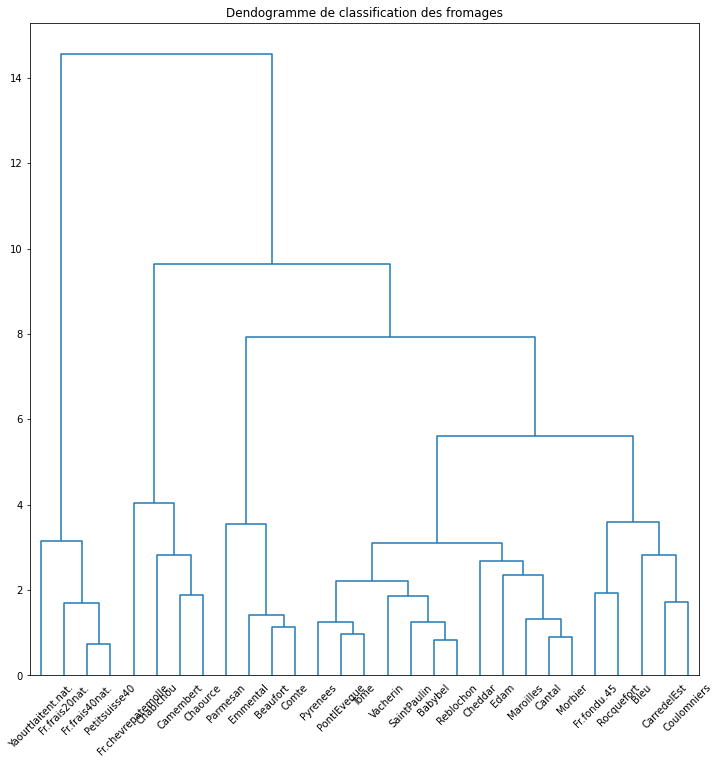

In [11]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=y.to_numpy(), orientation='top',color_threshold=0)
plt.show()

Avec une régle, on peut choisir différents niveaux de classification selon l'abitrage que l'on souhaite faire entre variance intra-classes et inter-classes. Par exemple : 

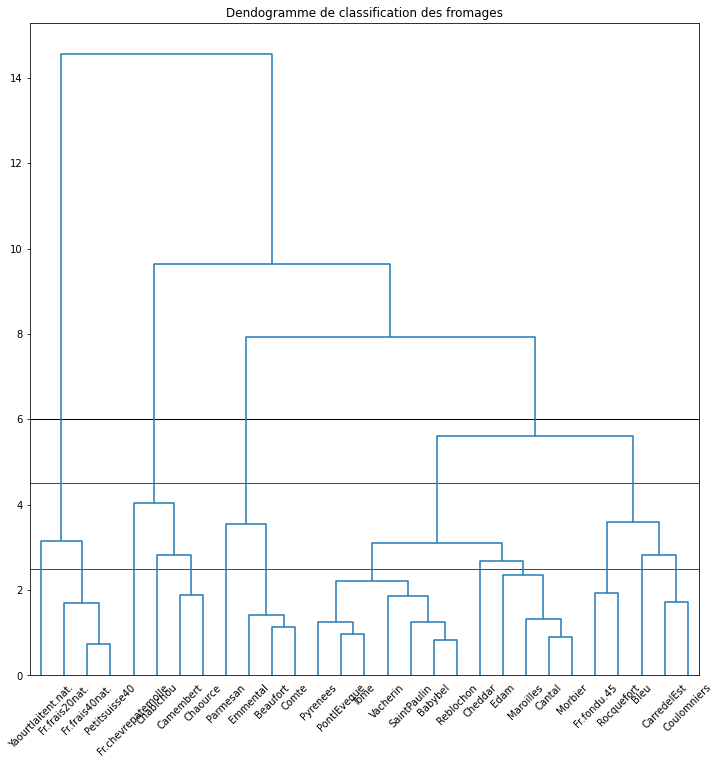

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=y.to_numpy(), orientation='top',color_threshold=0)
ax.axhline(y=2.5,c="red",linewidth=1,zorder=0)
ax.axhline(y=4.5,c="green",linewidth=1,zorder=0)
ax.axhline(y=6,c="black",linewidth=1,zorder=0)
plt.show()

On peut colorer le dendogramme en fonction de la distance maximum souhaitée à l'intérieur des classes : 


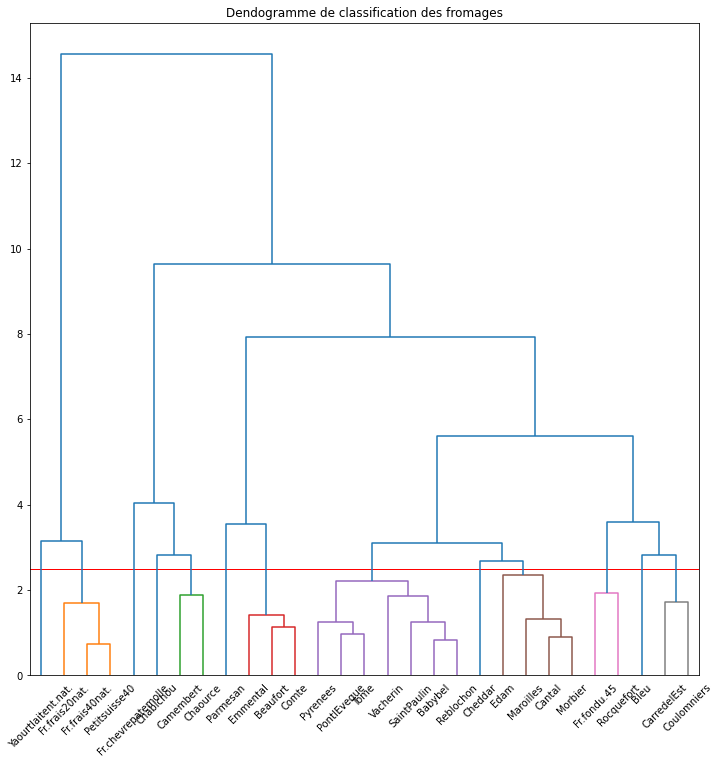

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=y.to_numpy(), orientation='top',color_threshold=2.5)
ax.axhline(y=2.5,c="red",linewidth=1,zorder=0)
plt.show()

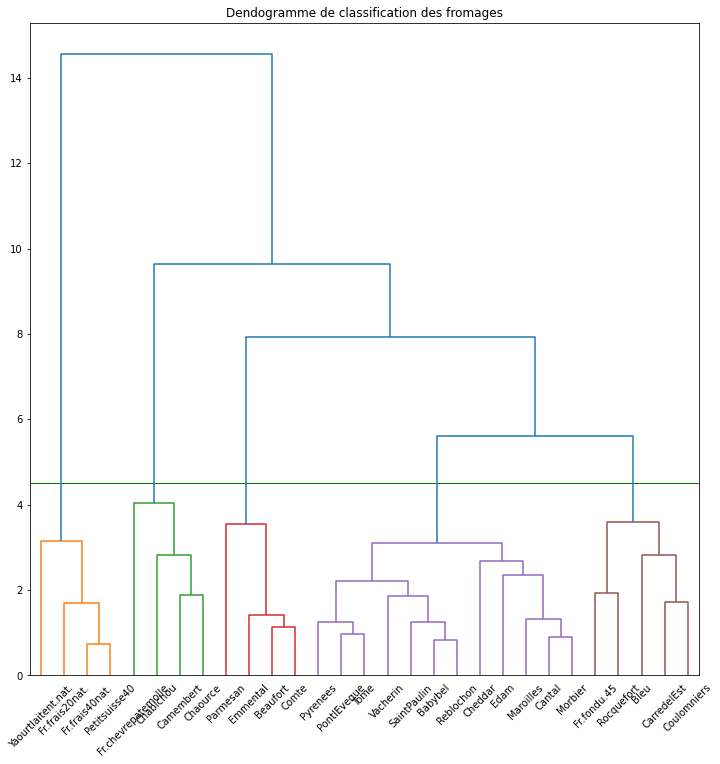

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=y.to_numpy(), orientation='top',color_threshold=4.5)
ax.axhline(y=4.5,c="green",linewidth=1,zorder=0)
plt.show()

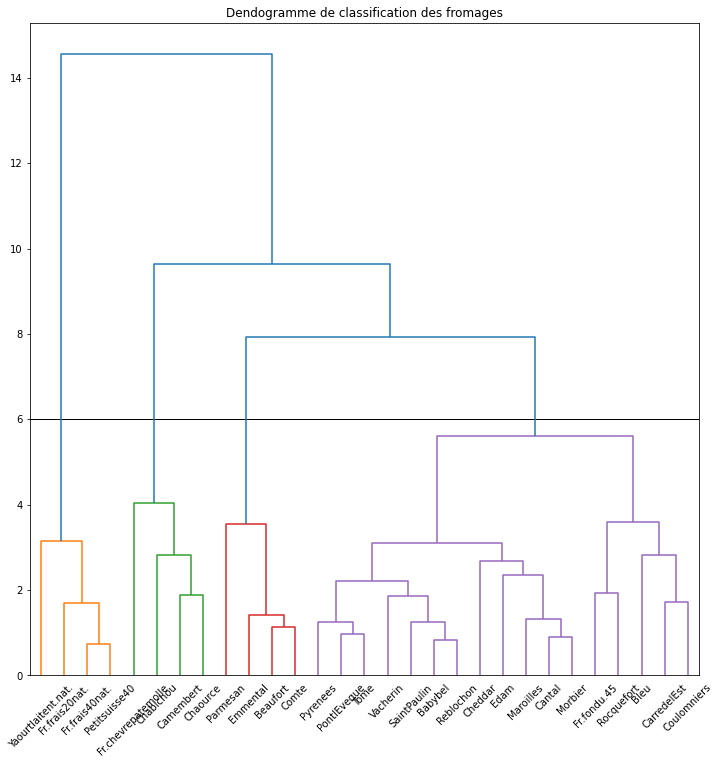

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=y.to_numpy(), orientation='top',color_threshold=6)
ax.axhline(y=6,c="black",linewidth=1,zorder=0)
plt.show()

## Découpage en classes  
Selon l'étude du dendogramme on choisit un nombre de classes. Je le fixe personnellement à 5 car je trouve que l'homogénéité à l'intérieur de chaque classe est satisfaisante. On utilise la fonction `fcluster` et le seuil correspondant au nombre de classes choisi :   

In [16]:
from scipy.cluster.hierarchy import fcluster
classes_cah = fcluster(Z, t = 4.5, criterion = 'distance')

# On trie par index
index_cah = np.argsort(classes_cah)
classes_cah[index_cah]

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5], dtype=int32)

On affiche les labels des fromages et la classe à laquelle ils appartiennent : 

In [17]:
pd.DataFrame({"Fromage" : y.to_numpy()[index_cah], "Groupe" : classes_cah[index_cah]})

,Fromage,Groupe
0,Yaourtlaitent.nat.,1
1,Petitsuisse40,1
2,Fr.frais40nat.,1
3,Fr.frais20nat.,1
4,Camembert,2
5,Chabichou,2
6,Chaource,2
7,Fr.chevrepatemolle,2
8,Beaufort,3
9,Parmesan,3


### Exercice 1 : Iris
- Chargez les données iris contenues dans `sklearn.datasets`  
- Faites une classification ascendante hiérarchique et comparez vos résultats avec les espèces connues des fleurs

### Exercice 2 : données simulées
- Faites tourner une CAH sur les données utilisées pour illustrer DBSCAN (code ci-dessous). Illustrez vos résultats avec un nuage de points qui changent de couleur par classe
- A-t-on de meilleurs résultats qu'avec k-means?

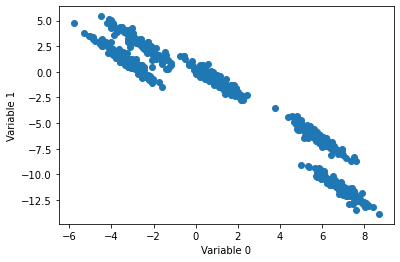

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# génération de données de cluster
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)

# on transforme les données pour les "étendre"
np.random.seed(74)
transformation = np.random.normal(size=(2, 2))
X = X @ transformation

# on les affiche
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Variable 0")
plt.ylabel("Variable 1")
plt.show()